<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter7/Chapter7_3_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 일원배치 분산분석(One-way ANOVA)
iris 데이터를 이용하여 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같은지 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자.  

In [ ]:
# 데이터로드
import scipy.stats as stats
import pandas as pd

iris_data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv")
iris_data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
iris_data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris_data.target.value_counts()

,count
target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# 분산분석을 하기 위해 target별로 변수에 할당하여 분산분석을 진행해보자
setosa = iris_data[iris_data['target'] == 'Iris-setosa']['sepal width']
versicolor = iris_data[iris_data['target'] == 'Iris-versicolor']['sepal width']
virginica = iris_data[iris_data['target'] == 'Iris-virginica']['sepal width']

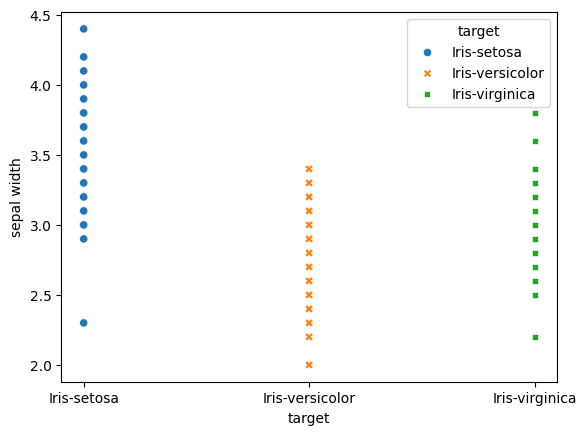

In [ ]:
# target을 시각화해보고 target의 분포를 확인해보자
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = 'target',
                y = 'sepal width',
                hue = 'target',
                style = 'target',
                data = iris_data)
plt.show()

시각화하여 보았을 때, 3종류의 Sepal.width의 평균은 차이가 있어 보인다. 통계적으로 차이가 있는지를 검정해보자  
귀무가설 : 세가지 종에 대해 sepal.width의 평균은 모두 같다  
대립가설 : 적어도 하나의 종에 대한 sepal.width의 평균값에는 차이가 있다.

In [ ]:
# 우선 정규성을 띄는지 확인해보자
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.9686918964570316, pvalue=0.20465666067562632)
ShapiroResult(statistic=0.9741332819702798, pvalue=0.3379951061741378)
ShapiroResult(statistic=0.9673905311257006, pvalue=0.18089604109069918)


모두 p-value가 0.05보다 크므로, 정규성을 가진다고 볼 수 있다.  
따라서 등분산 검정을 시행한다.(하나의 표본이라도 정규성을 만족하지 않는다면 kruskal을 고려해봐야 함)

In [ ]:
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

모두 p-value가 0.05보다 크므로, 등분산성 또한 만족한다고 볼 수 있다.  
따라서 일원배치 분산분석을 시행한다.  

In [ ]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

p-value가 0.05보다 작으므로, 종에 따른 sepal.width의 평균에 차이가 있다고 볼 수 있다.

## 사후검정
세 가지 종들 중 특히 어떠한 종들 간에 꽃받침의 폭에 차이가 있는지를 파악하기 위해 사후검정을 수행해보자.

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.5 MB/s eta 0:00:00


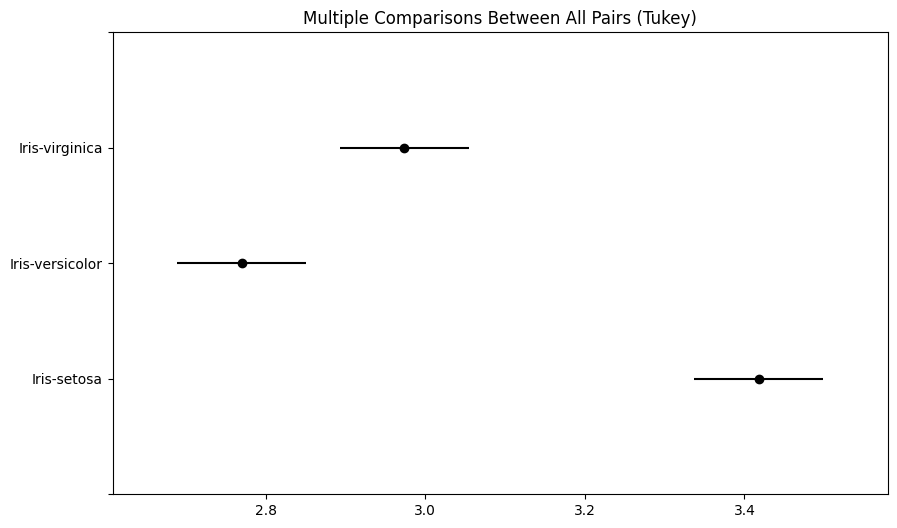

In [ ]:
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris_data['sepal width'], groups = iris_data['target'])
tuekeyhsd = mc.tukeyhsd(alpha = 0.05)
fig = tuekeyhsd.plot_simultaneous()

In [ ]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


모든 p-adj가 작으므로, 각각의 비교에 대한 귀무가설을 모두 기각하고,(귀무가설 : 집단들 사이의 평균은 같다) 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다.  
또한, versicolor - setosa간 꽃받침의 폭이 통계적으로 유의하게 큰 값을 가진다고 해석할 수 있다.

# 이원배치 분산분석(Two-way ANOVA)

mtcars데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다. am 변수는 변속기 종류이며, cyl변수는 실린더 개수를 의미한다. 데이터를 분석에 적절한 형태로 처리한 후, 변속기 종류(am 변수)와 실린더 개수(cly)에 따라 주행거리(mpg 변수) 평균에 유의미한 차이가 존재하는지 이원배치 분산분석을 수행하고, 그 결과를 해석해보자.(정규성, 등분산성을 만족한다는 가정하에)

In [3]:
# 먼저 데이터를 불러온다
import pandas as pd
mtcars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv')
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [4]:
mtcars.isna().sum()

,0
Unnamed: 0,0
mpg,0
cyl,0
disp,0
hp,0
drat,0
wt,0
qsec,0
vs,0
am,0


In [5]:
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [6]:
mtcars = mtcars[['mpg','am','cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [9]:
#mpg는 연속형이며, 독립변수로 설정할 am과 cyl변수는 int64(수치형) 자료이지만, 의미상 범주형 변수임을 확인하였다.
## 분산분석 수행
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~C(cyl) + C(am) + C(cyl):C(am)'

model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


1. cyl 변수와 am 변수간의 상호작용 효과에 대한 검정결과, p-value가 0.05보다 크므로, 교호작용이 존재하지 않는다는 것을 알 수 있다. 교호작용이 존재하지 않을 때, 아래와 같은 주효과 검정이 의미를 갖는다.
2. cyl변수에 대한 p-value는 0.05보다 작으므로, 귀무가설을 기각한다. 따라서 실린더 개수에 따른 주행거리 간에 유의미한 차이는 존재한다고 해석할 수 있다.
3. am변수에 대한 p-value는 0.05보다 크므로, 귀무가설을 채택한다, 즉 변속기 종류에 따른 주행거리 평균간 차이는 존재하지 않는다고 해석할 수 있다.

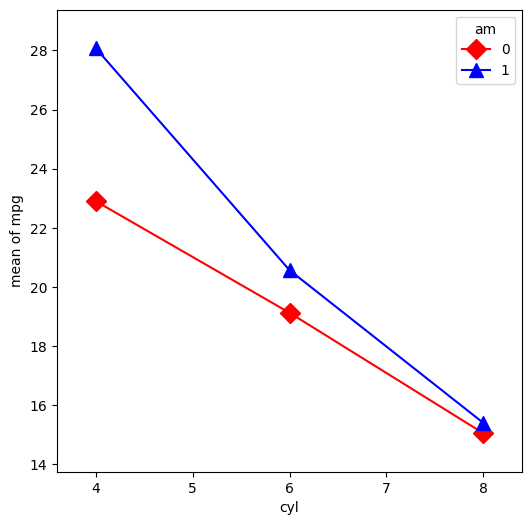

In [10]:
# 교호작용 효과는 그래프를 보고 해석하는 것이 더욱 직관적이고 해석하기에 용이하다.
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg, colors= ['red', 'blue'], markers = ['D','^'],
                       ms = 10, ax = ax)